<a href="https://colab.research.google.com/github/sdonapar/BMLSP/blob/master/2_Image_classification_with_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decrypting Image Net for DOG CAT classification**








##Installing requirements using pip

In [0]:
#for downloading model from Gdrive
! pip install gdown

In [0]:
! pip install lime

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for lime: filename=lime-0.1.1.36-cp36-none-any.whl size=284191 sha256=2bb50303b7f449c938d025035fd6a3637375e043a0a9f1caa92274b0609de6b4
  Stored in directory: /root/.cache/pip/wheels/a9/2f/25/4b2127822af5761dab9a27be52e175105772aebbcbc484fb95
Successfully built lime


##Cloning tf-models Repository for running inference

In [0]:
#for setting up slim 
! git clone https://github.com/marcotcr/tf-models.git

Cloning into 'tf-models'...
remote: Enumerating objects: 2667, done.
remote: Total 2667 (delta 0), reused 0 (delta 0), pack-reused 2667
Receiving objects: 100% (2667/2667), 50.11 MiB | 28.84 MiB/s, done.
Resolving deltas: 100% (1186/1186), done.


In [0]:
#setting appropriate path
! mkdir tf-models/slim/pretrained


- We are using [Inception v3](https://medium.com/@sh.tsang/review-inception-v3-1st-runner-up-image-classification-in-ilsvrc-2015-17915421f77c).
- You can use various other models like [Resnet](https://medium.com/@sh.tsang/review-inception-v3-1st-runner-up-image-classification-in-ilsvrc-2015-17915421f77c), [AlexNet](https://medium.com/@smallfishbigsea/a-walk-through-of-alexnet-6cbd137a5637), and [MobileNet](https://arxiv.org/abs/1704.04861)
#Downloding data from drive
- Model: inception_v3.ckpt
- Images for inference are downloaded from Gdrive

In [0]:
! gdown https://drive.google.com/uc?id=1G7YXx539mS1r0q8iN8Cb_o0aV9O2VEyo
! gdown https://drive.google.com/uc?id=1XqEiYYmJURMhKswhEqRkxkhph-InWkWD

Downloading...
From: https://drive.google.com/uc?id=1G7YXx539mS1r0q8iN8Cb_o0aV9O2VEyo
To: /content/inception_v3.ckpt
109MB [00:01, 55.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XqEiYYmJURMhKswhEqRkxkhph-InWkWD
To: /content/singleDog.jpg
100% 83.7k/83.7k [00:00<00:00, 65.1MB/s]


In [0]:
#move the ceckpoint model to the retrained directory

import shutil
shutil.move("inception_v3.ckpt", "tf-models/slim/pretrained/inception_v3.ckpt")   

'tf-models/slim/pretrained/inception_v3.ckpt'

In [0]:
#Check if model moved
! ls tf-models/slim/pretrained/

inception_v3.ckpt


Downloading sample Images- Download different and check how your model learnt the features

In [0]:
! gdown https://drive.google.com/uc?id=1MYQPQzQcHOjRLHXQ2aT135YT0bw3z0t8
! gdown https://drive.google.com/uc?id=1MYQPQzQcHOjRLHXQ2aT135YT0bw3z0t8

Downloading...
From: https://drive.google.com/uc?id=1MYQPQzQcHOjRLHXQ2aT135YT0bw3z0t8
To: /content/catdog.jpg
100% 5.70k/5.70k [00:00<00:00, 4.97MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MYQPQzQcHOjRLHXQ2aT135YT0bw3z0t8
To: /content/catdog.jpg
100% 5.70k/5.70k [00:00<00:00, 4.54MB/s]


In [0]:
! gdown https://drive.google.com/uc?id=1VGUwQaY_3BrUMocKjIhlia-KSMLGXSO4
! gdown https://drive.google.com/uc?id=1p74gI5Fxsiijss9GEqqyN_uBfHIrvhaN

Downloading...
From: https://drive.google.com/uc?id=1VGUwQaY_3BrUMocKjIhlia-KSMLGXSO4
To: /content/carbike.jpg
100% 126k/126k [00:00<00:00, 38.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p74gI5Fxsiijss9GEqqyN_uBfHIrvhaN
To: /content/dogs2.jpg
100% 47.0k/47.0k [00:00<00:00, 40.5MB/s]


In [0]:
! gdown https://drive.google.com/uc?id=1ZE3x7cUq4KlWg9SPnuThIPzRIxvaVj9h
! gdown https://drive.google.com/uc?id=12jDdPVNDPdNFEqiDiaOHxYZP6LIYeiYg


Downloading...
From: https://drive.google.com/uc?id=1ZE3x7cUq4KlWg9SPnuThIPzRIxvaVj9h
To: /content/catout.jpg
100% 71.5k/71.5k [00:00<00:00, 26.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=12jDdPVNDPdNFEqiDiaOHxYZP6LIYeiYg
To: /content/catin.jpg
100% 78.1k/78.1k [00:00<00:00, 59.9MB/s]


#Importing necessary libraries

In [0]:
import sys
sys.path.append('/content/tf-models/slim')
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
import tensorflow as tf
slim = tf.contrib.slim

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



##Create a predict fn for inception v3.
**Input:** List of images 

**Ouput:** A matrix of prediction probabilities


In [0]:
from nets import inception
from preprocessing import inception_preprocessing

In [0]:
#initialise a session
session = tf.Session()

In [0]:
#getting image_size
image_size = inception.inception_v3.default_image_size

In [0]:
#function to trnasform the image to the required width and height

def transform_img_fn(path_list):
    out = []
    for f in path_list:
        image_raw = tf.image.decode_jpeg(open(f,'rb').read(), channels=3)
        image = inception_preprocessing.preprocess_image(image_raw, image_size, image_size, is_training=False)
        out.append(image)
    return session.run([out])[0]

In [0]:
#Fetching the image Net labels

from datasets import imagenet
names = imagenet.create_readable_names_for_imagenet_labels()

In [0]:
processed_images = tf.placeholder(tf.float32, shape=(None, 299, 299, 3))

In [0]:
#Loading the logits for the probabilities from softmax

import os
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, _ = inception.inception_v3(processed_images, num_classes=1001, is_training=False)


In [0]:
probabilities = tf.nn.softmax(logits)

In [0]:
#Loading model
checkpoints_dir = '/content/tf-models/slim/pretrained'
init_fn = slim.assign_from_checkpoint_fn(
    os.path.join(checkpoints_dir, 'inception_v3.ckpt'),
    slim.get_model_variables('InceptionV3'))
init_fn(session)

INFO:tensorflow:Restoring parameters from /content/tf-models/slim/pretrained/inception_v3.ckpt


In [0]:
#prediction Function for running inference

def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})

#**Let's check top 5 predictions for an image with a single dog**






206 flat-coated retriever 0.0016583558
853 tennis ball 0.006057862
523 croquet ball 0.006677351
214 Irish setter, red setter 0.017616175
208 golden retriever 0.9110448


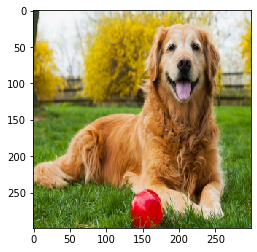

In [0]:
images = transform_img_fn(['singleDog.jpg']) #can append more names in the list
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = predict_fn(images)
for x in preds.argsort()[0][-5:]:
    print (x, names[x], preds[0,x])

In [0]:
#assign image you chose
image = images[0]

##**Time to get an Explanation!!**

In [0]:
from lime import lime_image
import time

In [0]:
from skimage.segmentation import mark_boundaries

In [0]:
explainer = lime_image.LimeImageExplainer()

*Image classifiers are a bit slow. 
Be patient !*
* It'll take 4 minutes or so


In [0]:
tmp = time.time()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(image, predict_fn, top_labels=10, hide_color=0, num_samples=1000)
print (time.time() - tmp)

208.96614170074463


##**Inference for image with only 1 object**

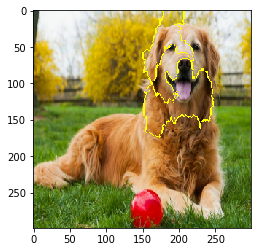

In [0]:
#choose a label to get explanation for
label = 208
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Let's check the positive and negative contributing regions to the prediction**

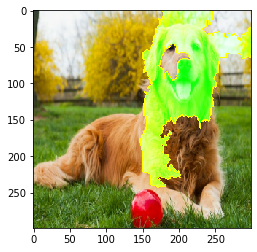

In [0]:
#can change label
label = 208
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## **EXERCISE** :

# Change the labels from [ 206, 853, 523, 214, 208] for this image

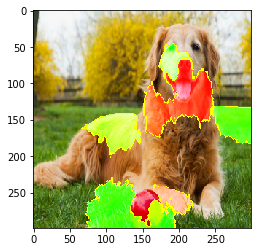

In [0]:
label = 523 #croquet ball
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

# Let's see how the Explainer Performs with more complex images with both cat and dog

264 Pembroke, Pembroke Welsh corgi 0.0451369
167 Walker hound, Walker foxhound 0.06983207
265 Cardigan, Cardigan Welsh corgi 0.07921626
216 Brittany spaniel 0.08648479
168 English foxhound 0.12468172


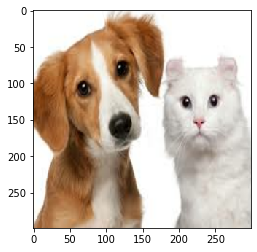

In [0]:
images = transform_img_fn(['catdog.jpg']) #can append more names in the list
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = predict_fn(images)
for x in preds.argsort()[0][-5:]:
    print (x, names[x], preds[0,x])

# Building the explainer

In [0]:
tmp = time.time()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], predict_fn, top_labels=10, hide_color=0, num_samples=1000)
print (time.time() - tmp)

208.7043581008911


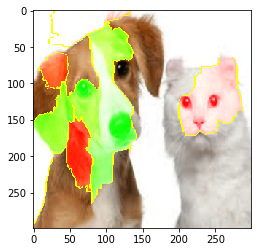

In [0]:
label = 168
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.02)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

##**Let's visualise outputs for low confidence predictions**

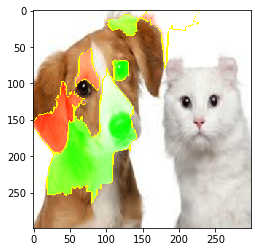

In [0]:
label  = 264
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

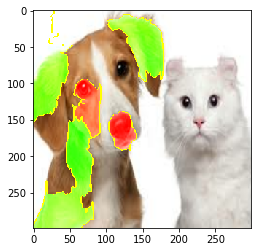

In [0]:
label = 216
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## *You can clearly see that cat is not identified since the pixels belonginng to cat are considered towards negative contribution*

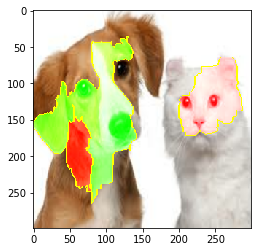

In [0]:
label = 168
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

- The explanation from LIME Clearly suggests why the confidence scores are low for some images and high for some images. 
- The get_image_and_mask function clearly demarcates the pixel region which contributes to the prediction towards the correct label.
- Thus LIME can decrypt the predictions of any deep learning model by providing human understandable decision boundaries
- More Examples of cats and dogs have been given in the notebook. Do try it out and amaze yourself!

#References for further Understanding:
- For understanding how classifier works: https://bit.ly/2P07enl
- For understanding more about get_image_mask function in LIME: https://github.com/marcotcr/lime